In [530]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import csv
import numpy as np
import urllib.request
import requests
import json

In [531]:
# Imports the first csv file    
df = pd.read_csv (r'stops.csv')

filename = 'stops.csv'
with open('stops.csv') as f:
    reader = csv.reader(f)
    header_row = next(reader)
#To display the headers 
# print(header_row)
# print("This is the total number of rows in the file:", '\n' ,len(df))

In [532]:
# Drops the columns that arent needed
df.drop(columns=['CITATION_CONTROL_NUMBER', 'ACTIVITY_DATE', 'ACTIVITY_TIME', 'ACTIVITY_LOCATION', 'ACTIVITY_DIVISION', 'ACTIVITY_BEAT', 'NUMBER_OF_PASSENGERS', 'WAS_VEHCILE_SEARCHED', 'REASON_FOR_SEARCH', 'ObjectId'], inplace=True)
# Renames the data o_xxx is for officer data on citation stops d_xxx is for driver data
df.rename(columns={'TYPE_OF_STOP':'stop', 'ACTIVITY_RESULTS':'action', 'OFFICER_GENDER':'o_gender', 'OFFICER_RACE':"o_race", 'OFFICER_AGE_RANGE':"o_age", 'DRIVER_GENDER':'d_gender', 'DRIVER_RACE':"d_race", 'DRIVER_AGE_RANGE':"d_age"}, inplace=True)
# Displays the new dataframe 
df.head()

,stop,action,o_gender,o_race,o_age,d_gender,d_race,d_age
0,COMPLAINT/CRIMINAL VIOLATION,CITATION ISSUED,M,WHITE,21 - 30,M,BLACK,16 - 19
1,TRAFFIC VIOLATION,CITATION ISSUED,F,WHITE,21 - 30,M,WHITE,16 - 19
2,COMPLAINT/CRIMINAL VIOLATION,CITATION ISSUED,M,WHITE,21 - 30,F,BLACK,31 - 40
3,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,31 - 40,M,HISPANIC,20 - 25
4,COMPLAINT/CRIMINAL VIOLATION,CITATION ISSUED,M,WHITE,31 - 40,M,HISPANIC,20 - 25


In [533]:
df['o_race'] = df['o_race'].replace(['UNKNOWN'], ' ')
df.drop(df.loc[df['o_race']==' '].index, inplace=True)
df.sort_values(by=['o_race'], inplace=True)

In [534]:
# Identifies the races of the officers. 
df.o_race.unique()

array(['ASIAN', 'BLACK', 'HISPANIC', 'WHITE'], dtype=object)

In [535]:
# This brings in the second set of data
df3 = pd.read_csv (r'employee.csv')

filename = 'employee.csv'
with open('employee.csv') as f:
    reader = csv.reader(f)
    header_row = next(reader)
#To display the headers
# print(header_row)
# print("This is the total number of rows in the file:", '\n' ,len(df))
# df3.head()

This replaces the vales with simple unique values. Then drops columns that we dont need. 

In [536]:
# Drops the columns that are not needed 
df3.drop(columns=['AOC_CODE', 'RANK_TITLE', 'OFFICER_DIVISION', 'OFFICER_ASSIGNMENT', 'OFFICER_YEARS_SWORN', 'ObjectId'], inplace=True)
# Renames the colums to simple labels oh_xxx Officer Hired xxx 
df3.rename(columns={'OFFICER_SEX':'oh_sex', 'OFFICER_RACE':'oh_race', 'OFFICER_AGE_RANGE':'oh_age_range', 'OFFICER_AGE':"oh_age"}, inplace=True)
# df3.head()


In [537]:
# Drops all the rows that dont have an age for the officer
df3.drop(df3.loc[df3['oh_age']==0].index, inplace=True)
df3.sort_values(by=['oh_age'], inplace=True)
# df3.head(15)

In [538]:
# Replaces the U value
df3['oh_race'] = df3['oh_race'].replace(['U '], ' ')
df3.drop(df3.loc[df3['oh_race']==' '].index, inplace=True)
df3.sort_values(by=['oh_race'], inplace=True)
# df3.head(15)

In [539]:
# Verfies the U value replaced 
df3.oh_race.unique()

array(['A ', 'B ', 'H ', 'W '], dtype=object)

In [540]:
# stats ran on officers age
print("The mean officer age is:", df3['oh_age'].mean())
print("The max officer age is:", df3['oh_age'].max())
print("The min officer age is:", df3['oh_age'].min())


The mean officer age is: 45.23181304183943
The max officer age is: 81
The min officer age is: 21


 This fills the second requirement.

In [541]:
# Joins the 2 csv files. 
df4 =  pd.concat([df, df3], axis = 1, join="inner")
df4.head()
# print(header_row)

,stop,action,o_gender,o_race,o_age,d_gender,d_race,d_age,oh_sex,oh_race,oh_age_range,oh_age
647,TRAFFIC VIOLATION,CITATION ISSUED,M,ASIAN,21 - 30,M,BLACK,26 - 30,M,W,50 - 59,53
466,TRAFFIC VIOLATION,CITATION ISSUED,M,ASIAN,31 - 40,M,BLACK,31 - 40,M,W,50 - 59,50
2579,TRAFFIC VIOLATION,CITATION ISSUED,M,ASIAN,31 - 40,F,HISPANIC,31 - 40,M,W,21 - 29,25
221,TRAFFIC VIOLATION,CITATION ISSUED,M,ASIAN,31 - 40,F,WHITE,20 - 25,M,W,40 - 49,46
2587,TRAFFIC VIOLATION,CITATION ISSUED,M,ASIAN,21 - 30,F,WHITE,31 - 40,M,W,21 - 29,25


In [542]:
# removes unknown values
df4['o_gender'] = df4['o_gender'].fillna('unknown')
df4.head()

,stop,action,o_gender,o_race,o_age,d_gender,d_race,d_age,oh_sex,oh_race,oh_age_range,oh_age
647,TRAFFIC VIOLATION,CITATION ISSUED,M,ASIAN,21 - 30,M,BLACK,26 - 30,M,W,50 - 59,53
466,TRAFFIC VIOLATION,CITATION ISSUED,M,ASIAN,31 - 40,M,BLACK,31 - 40,M,W,50 - 59,50
2579,TRAFFIC VIOLATION,CITATION ISSUED,M,ASIAN,31 - 40,F,HISPANIC,31 - 40,M,W,21 - 29,25
221,TRAFFIC VIOLATION,CITATION ISSUED,M,ASIAN,31 - 40,F,WHITE,20 - 25,M,W,40 - 49,46
2587,TRAFFIC VIOLATION,CITATION ISSUED,M,ASIAN,21 - 30,F,WHITE,31 - 40,M,W,21 - 29,25


In [543]:
# verifies the unknow value is gone
df4.o_gender.unique()

array(['M', 'F'], dtype=object)

In [544]:
# removes blank values
df4['oh_sex'] = df4['oh_sex'].fillna(' ')
df4.oh_sex.unique()

array(['M', 'F'], dtype=object)

This section sorts the data frame by the officer hired's age. 

In [545]:
df4.sort_values(by=['oh_age'], inplace=True)
df4.oh_age.replace(to_replace = 0, value = "NaN ", inplace=True)
# df4.head(15)

In [546]:
# dict of drivers 
d_gender = dict({
    'Driver Female' : sum(df4.d_gender == 'F'),
    'Driver Male' : sum(df4.d_gender == 'M')
})

# print(d_gender)


In [547]:
# dict of officers 
oh_sex = dict( {
    'Male Officer' : sum(df4.oh_sex == 'M'),
    'Female Offier' : sum(df4.oh_sex == 'F')
})

# print(oh_sex)

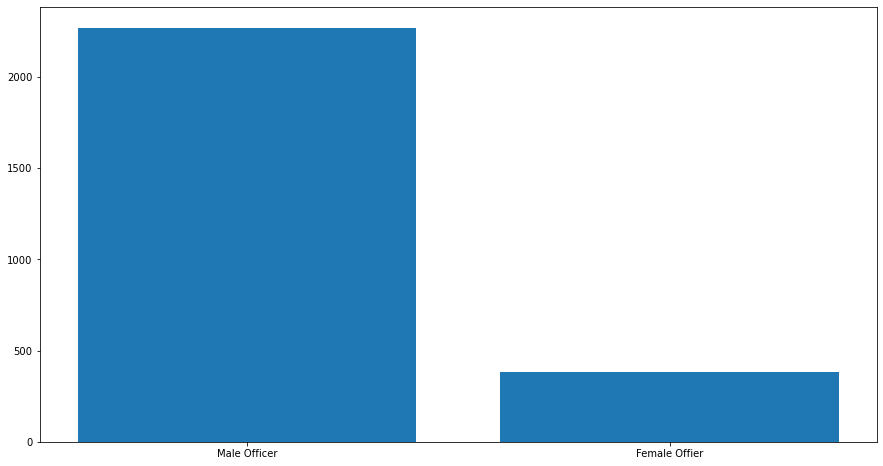

In [548]:
# officer male to female comp
data = oh_sex
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.show()

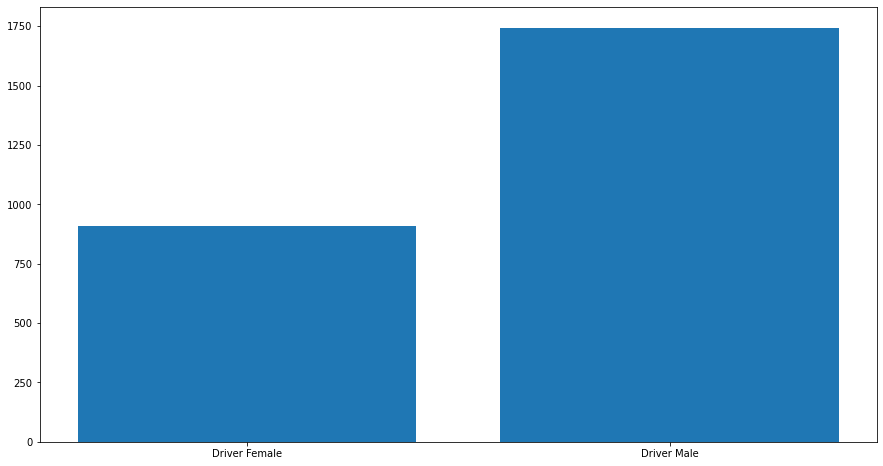

In [549]:
# cited driver comp
data = d_gender
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.show()

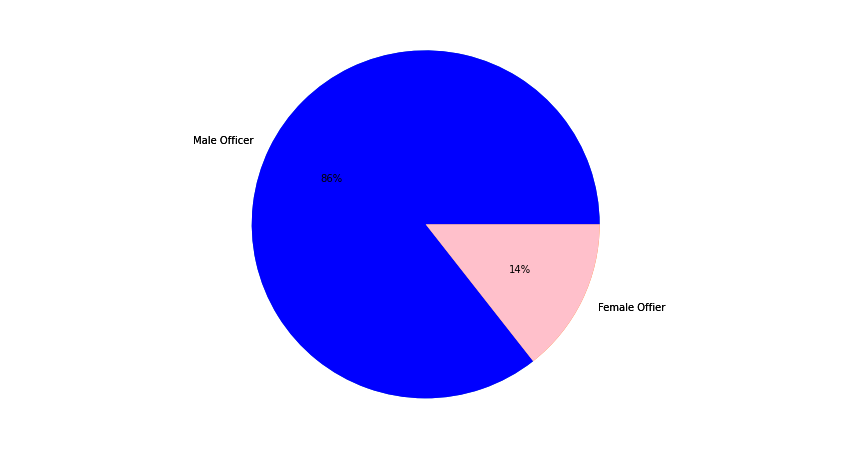

In [563]:
# officer data as pie chart 
# Data to plot
labels = []
sizes = []

for x, y in oh_sex.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels)

plt.axis('equal')
plt.pie(sizes, labels=labels, autopct='%1.0f%%', colors = ['blue', 'pink'])
plt.show()

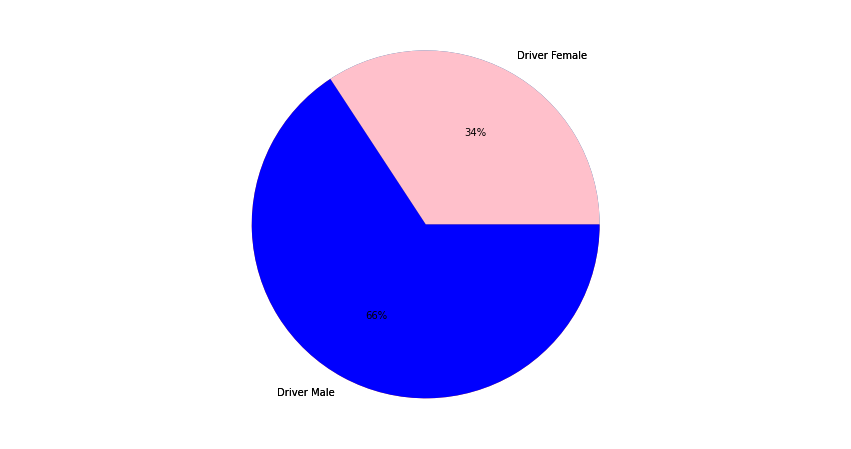

In [565]:
# driver data as pie
# Data to plot
labels = []
sizes = []

for x, y in d_gender.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels)

plt.axis('equal')
plt.pie(sizes, labels=labels, autopct='%1.0f%%', colors = ['pink', 'blue'])
plt.show()

In [552]:
df4.head(20)


,stop,action,o_gender,o_race,o_age,d_gender,d_race,d_age,oh_sex,oh_race,oh_age_range,oh_age
2463,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,21 - 30,F,BLACK,OVER 60,M,W,21 - 29,21
2462,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,21 - 30,M,BLACK,41 - 50,M,W,21 - 29,21
2409,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,21 - 30,M,BLACK,41 - 50,M,W,21 - 29,22
2436,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,51 - 60,F,WHITE,51 - 60,M,W,21 - 29,22
2435,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,51 - 60,F,BLACK,20 - 25,M,B,21 - 29,22
2433,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,51 - 60,M,WHITE,26 - 30,M,H,21 - 29,22
2459,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,41 - 50,M,WHITE,51 - 60,F,W,21 - 29,22
2425,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,51 - 60,M,WHITE,OVER 60,M,W,21 - 29,22
2418,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,51 - 60,M,WHITE,26 - 30,M,W,21 - 29,22
2469,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,41 - 50,M,WHITE,20 - 25,M,B,21 - 29,22


In [553]:
# df4['o_race'].count('WHITE')
# df4.count()
# df4.set_index(["o_race", 'd_race']).count(level="o_race")

In [554]:
df4.set_index(["o_race", 'd_race']).count(level="d_race")


/var/folders/t5/sxblnh9s6r744cwj7y86ts1r0000gn/T/ipykernel_5547/1152078839.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.count(level=1) should use df.groupby(level=1).count().
  df4.set_index(["o_race", 'd_race']).count(level="d_race")


,stop,action,o_gender,o_age,d_gender,d_age,oh_sex,oh_race,oh_age_range,oh_age
d_race,,,,,,,,,,
ASIAN,13,13,13,13,13,13,13,13,13,13
BLACK,963,963,963,963,963,963,963,963,963,963
HISPANIC,164,164,164,164,164,164,164,164,164,164
WHITE,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


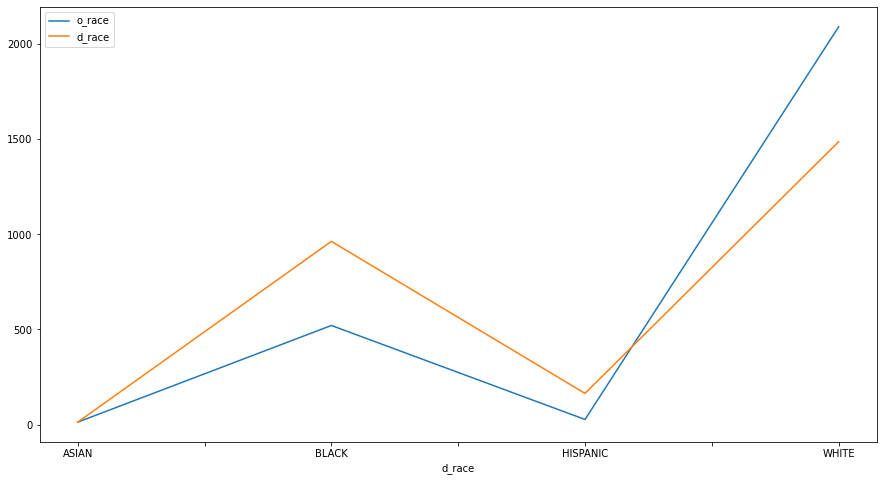

In [555]:
oraces =  df4.groupby('o_race')['o_race'].count().plot(legend=True)
draces =  df4.groupby('d_race')['d_race'].count().plot(legend=True)
print(oraces)
print(draces)

In [556]:
# counts officers race and drivers race number indicates citations given or recieved
oraces =  df4.groupby('o_race')['o_race'].count()
draces =  df4.groupby('d_race')['d_race'].count()
print(oraces)
print(draces)

o_race
ASIAN         13
BLACK        521
HISPANIC      27
WHITE       2091
Name: o_race, dtype: int64
d_race
ASIAN         13
BLACK        963
HISPANIC     164
WHITE       1487
Name: d_race, dtype: int64


In [557]:
#define index column
# oraces.set_index('o_race', inplace=True)

#group data by product and display sales as line chart
# oraces.groupby('o_race')['d_race'].plot(legend=True)

In [558]:
# ww =  df4.groupby('o_race')['d_race' == 'o_race'].count()

This counts the officers race to drivers race. 

In [559]:
# seperates and counts citations by officer race then driver race. 
df5 = df4.groupby(["o_race"])["d_race"].value_counts()
# df5 = df5.groupby(level=1).apply(lambda x: 100 * x / float(x.sum()))

print(df5)

o_race    d_race  
ASIAN     BLACK          6
          WHITE          6
          HISPANIC       1
BLACK     WHITE        279
          BLACK        190
          HISPANIC      34
          ASIAN          2
HISPANIC  WHITE         18
          BLACK          6
          HISPANIC       3
WHITE     WHITE       1184
          BLACK        761
          HISPANIC     126
          ASIAN         11
Name: d_race, dtype: int64


<AxesSubplot:xlabel='o_race,d_race'>

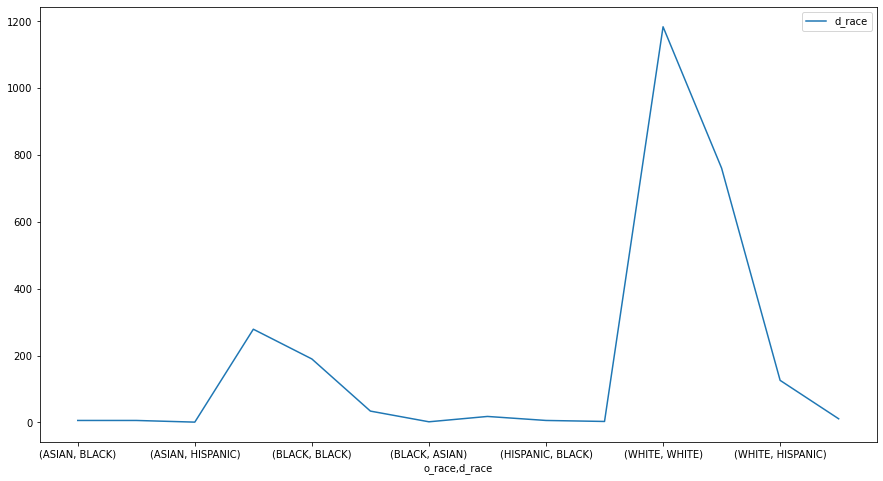

In [561]:
df4.groupby(["o_race"])["d_race"].value_counts().plot(legend=True)

This is the louisville poputation male to female percent and the officer and drivers male female makeup. 

In [ ]:
# gets counts gender counts by citation to determing percentages
df14 = df4.groupby(["o_gender"])["d_gender"].value_counts()

# louisville population % 
louisville_population = { 
    'fp' : [51.6],
    'mp' : [48.4],
    }

print(df14)

print(louisville_population)

# female officer citations 
ofc = {
    'cm' : [69/102*100],
    "cf" : [33/102*100]
}

# male officer citations 
omc = {
    'ccm' : [1682/2564*100],
    'ccf' : [882/2564*100]
}

print(omc)
print(ofc)

o_gender  d_gender
F         M             68
          F             32
M         M           1676
          F            876
Name: d_gender, dtype: int64
{'fp': [51.6], 'mp': [48.4]}
{'ccm': [65.600624024961], 'ccf': [34.39937597503901]}
{'cm': [67.64705882352942], 'cf': [32.35294117647059]}


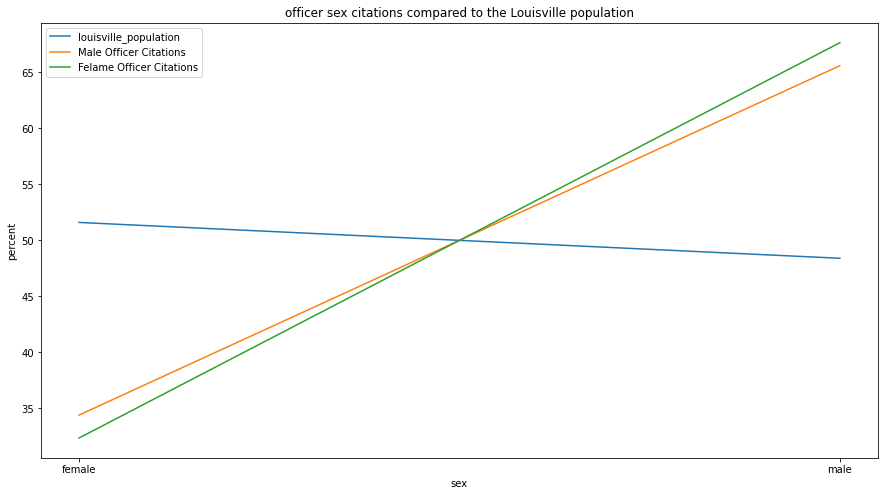

In [ ]:
# graph of above data to show males have a higher citation rate while population is almost equal   
# x axis values 
x = ['female', 'male'] 

# corresponding y axis values 
ys = {
    'louisville_population' : [51.6, 48.4],
    'Male Officer Citations' : [34.40, 65.60],
    'Felame Officer Citations' : [32.35, 67.65]
} 
 

for y in ys:
  plt.plot(x, ys[y], label=y)
  # print('For Month: ', y, "   Values: ", ys[y])

plt.legend()

    
# naming the x axis 
plt.xlabel('sex')

# naming the y axis 
plt.ylabel('percent') 
   
# giving a title to my graph 
plt.title('officer sex citations compared to the Louisville population') 
    
# function to show the plot 
plt.show() 

In [ ]:
# shows citation types and race make up of the stops 
df7 = df4.groupby(["stop"])["d_race"].value_counts()
print(df7)

stop                          d_race  
COMPLAINT/CRIMINAL VIOLATION  WHITE         46
                              BLACK         34
                              HISPANIC       6
COMPLIANCE STOP (KVE ONLY)    BLACK         10
                              WHITE          3
TRAFFIC VIOLATION             WHITE       1438
                              BLACK        919
                              HISPANIC     158
                              ASIAN         13
Name: d_race, dtype: int64


Counts the officers races

In [ ]:
# Counts the officers race 
df4.groupby(["o_race"])["d_race"].agg('count')


o_race
ASIAN         13
BLACK        505
HISPANIC      27
WHITE       2082
Name: d_race, dtype: int64

The below generates a dataframe with all the officers and citations by percentages. 

In [ ]:
# print(13+507+27+1+2104)

# White oficer data 

w=(2104/2652)
a=(13/2652)
b=(507/2652)
h=(27/2652)

w = w*100
a = a*100
b = b*100
h = h*100
# print(6+6+1+279+192+34+2+18+6+3+1+1189+765+128+11)

# Asain officer data 

aw = (6/2641)
aa = (0/2641)
ab = (6/2641)
ah = (1/2641)

aw = aw*100
aa = aa*100
ab = ab*100
ah = ah*100

# black officer data 

bw = (279/2641)
ba = (2/2641)
bb = (192/2641)
bh = (34/2641)

bw = bw*100
ba = ba*100
bb = bb*100
bh = bh*100

# Hispanic officer data 

hw = (18/2641)
ha = (0/2641)
hb = (6/2641)
hh = (3/2641)

hw = hw*100
ha = ha*100
hb = hb*100
hh = hh*100


# White officer data 

ww = (1189/2641)
wa = (11/2641)
wb = (765/2641)
wh = (128/2641)

ww = ww*100
wa = wa*100
wb = wb*100
wh = wh*100

# Police total citations

# print(1492+13+970+166+0)

tw = (1492/2641)
ta = (13/2641)
tb = (970/2641)
th = (166/2641)

tw = tw*100
ta = ta*100
tb = tb*100
th = th*100


data = { 'Race' : ['White', 'Asain', 'Black', 'Hispanic'],
'Officer Race %' : [w, a, b, h],
'Asain Office Citation %' : [aw, aa, ab, ah], 
'Black Officer Citation %' : [bw, ba, bb, bh],
'Hispanic Officer Citation %' : [hw, ha, hb, hh],
'White Officer Citation %' : [ww, wa, wb, wh],
'Louisville population %' : [62.9, 1.4, 33, 1.9],
'Total Citation by race %' : [tw, ta, tb, th]}
  
# Create the pandas DataFrame with column name is provided explicitly
df99 = pd.DataFrame(data)
# print dataframe.
df99


,Race,Officer Race %,Asain Office Citation %,Black Officer Citation %,Hispanic Officer Citation %,White Officer Citation %,Louisville population %,Total Citation by race %
0,White,79.336350,0.227187,10.564180,0.681560,45.020825,62.9,56.493752
1,Asain,0.490196,0.000000,0.075729,0.000000,0.416509,1.4,0.492238
2,Black,19.117647,0.227187,7.269973,0.227187,28.966301,33.0,36.728512
3,Hispanic,1.018100,0.037864,1.287391,0.113593,4.846649,1.9,6.285498


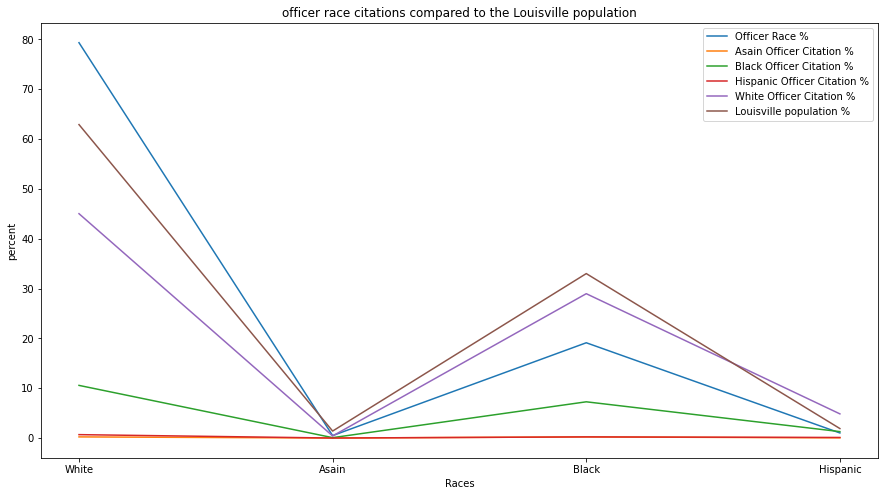

In [ ]:
# Graph of the above racial info. numbers generated by x officer / lmpd officer pop
# x axis values 
x = ['White', 'Asain', 'Black', 'Hispanic'] 

# corresponding y axis values 
ys = {
    'Officer Race %' : [w, a, b, h],
    'Asain Officer Citation %' : [aw, aa, ab, ah], 
    'Black Officer Citation %' : [bw, ba, bb, bh],
    'Hispanic Officer Citation %' : [hw, ha, hb, hh],
    'White Officer Citation %' : [ww, wa, wb, wh],
    'Louisville population %' : [62.9, 1.4, 33, 1.9]
} 
 

for y in ys:
  plt.plot(x, ys[y], label=y)
  # print('For Month: ', y, "   Values: ", ys[y])

plt.legend()

    
# naming the x axis 
plt.xlabel('Races')

# naming the y axis 
plt.ylabel('percent') 
   
# giving a title to my graph 
plt.title('officer race citations compared to the Louisville population') 
    
# function to show the plot 
plt.show() 

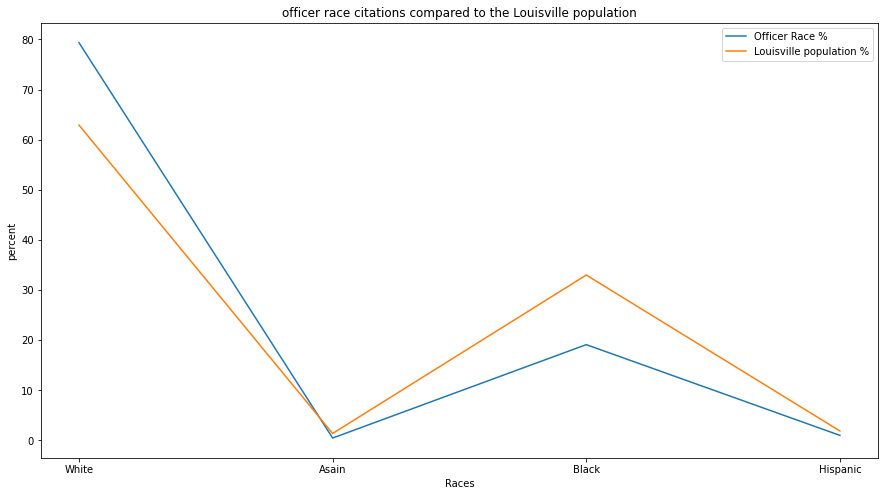

In [ ]:
# Comp between LMPD and louisville population 
# x axis values 
x = ['White', 'Asain', 'Black', 'Hispanic'] 

# corresponding y axis values 
ys = {
    'Officer Race %' : [w, a, b, h],
    'Louisville population %' : [62.9, 1.4, 33, 1.9]
} 
 

for y in ys:
  plt.plot(x, ys[y], label=y)
  # print('For Month: ', y, "   Values: ", ys[y])

plt.legend()

    
# naming the x axis 
plt.xlabel('Races')

# naming the y axis 
plt.ylabel('percent') 
   
# giving a title to my graph 
plt.title('officer race citations compared to the Louisville population') 
    
# function to show the plot 
plt.show() 

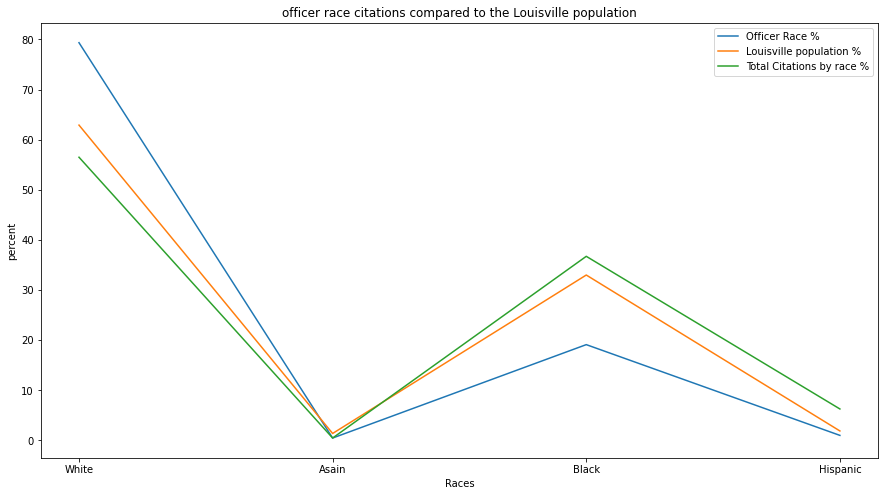

In [ ]:
# same as above but with the total citations added 
# x axis values 
x = ['White', 'Asain', 'Black', 'Hispanic'] 

# corresponding y axis values 
ys = {
    'Officer Race %' : [w, a, b, h],
    'Louisville population %' : [62.9, 1.4, 33, 1.9],
    'Total Citations by race %' : [tw, ta, tb, th]
} 
 

for y in ys:
  plt.plot(x, ys[y], label=y)
  # print('For Month: ', y, "   Values: ", ys[y])

plt.legend()

    
# naming the x axis 
plt.xlabel('Races')

# naming the y axis 
plt.ylabel('percent') 
   
# giving a title to my graph 
plt.title('officer race citations compared to the Louisville population') 
    
# function to show the plot 
plt.show() 

In [ ]:
# sub White oficer data 

tw=(2104/2652)
ta=(13/2652)
tb=(507/2652)
th=(27/2652)

tw = tw*100
ta = ta*100
tb = tb*100
th = th*100
# print(6+6+1+279+192+34+2+18+6+3+1+1189+765+128+11)

# Asain officer data 

taw = (6/13)
taa = (0/13)
tab = (6/13)
tah = (1/13)

taw = taw*100
taa = taa*100
tab = tab*100
tah = tah*100

# black officer data 

tbw = (279/507)
tba = (2/507)
tbb = (192/507)
tbh = (34/507)

tbw = tbw*100
tba = tba*100
tbb = tbb*100
tbh = tbh*100

# Hispanic officer data 

thw = (18/27)
tha = (0/27)
thb = (6/27)
thh = (3/27)

thw = thw*100
tha = tha*100
thb = thb*100
thh = thh*100


# White officer data 

tww = (1189/2093)
twa = (11/2093)
twb = (765/2093)
twh = (128/2093)

tww = tww*100
twa = twa*100
twb = twb*100
twh = twh*100

# Police total citations

# print(1492+13+970+166+0)

ttw = (1492/2641)
tta = (13/2641)
ttb = (970/2641)
tth = (166/2641)

ttw = ttw*100
tta = tta*100
ttb = ttb*100
tth = tth*100


data2 = { 'Race' : ['White', 'Asain', 'Black', 'Hispanic'],
'Officer Race %' : [tw, ta, tb, th],
'Asain Office Citation %' : [taw, taa, tab, tah], 
'Black Officer Citation %' : [tbw, tba, tbb, tbh],
'Hispanic Officer Citation %' : [thw, tha, thb, thh],
'White Officer Citation %' : [tww, twa, twb, twh],
'Louisville population %' : [62.9, 1.4, 33, 1.9],
'Total Citation by race %' : [ttw, tta, ttb, tth]}
  
# Create the pandas DataFrame with column name is provided explicitly
df98 = pd.DataFrame(data2)
# print dataframe.
df98

,Race,Officer Race %,Asain Office Citation %,Black Officer Citation %,Hispanic Officer Citation %,White Officer Citation %,Louisville population %,Total Citation by race %
0,White,79.336350,46.153846,55.029586,66.666667,56.808409,62.9,56.493752
1,Asain,0.490196,0.000000,0.394477,0.000000,0.525561,1.4,0.492238
2,Black,19.117647,46.153846,37.869822,22.222222,36.550406,33.0,36.728512
3,Hispanic,1.018100,7.692308,6.706114,11.111111,6.115624,1.9,6.285498


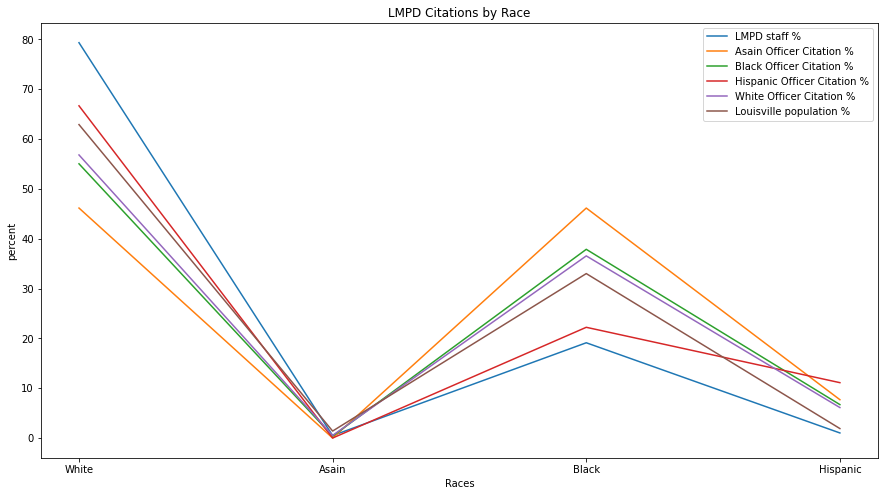

In [ ]:
# true break down by racial size 
# x axis values 
x = ['White', 'Asain', 'Black', 'Hispanic'] 

# corresponding y axis values 
ys = {
    'LMPD staff %' : [tw, ta, tb, th],
    'Asain Officer Citation %' : [taw, taa, tab, tah], 
    'Black Officer Citation %' : [tbw, tba, tbb, tbh],
    'Hispanic Officer Citation %' : [thw, tha, thb, thh],
    'White Officer Citation %' : [tww, twa, twb, twh],
    'Louisville population %' : [62.9, 1.4, 33, 1.9]
} 
 

for y in ys:
  plt.plot(x, ys[y], label=y)
  # print('For Month: ', y, "   Values: ", ys[y])

plt.legend()

    
# naming the x axis 
plt.xlabel('Races')

# naming the y axis 
plt.ylabel('percent') 
   
# giving a title to my graph 
plt.title('LMPD Citations by Race') 

plt.rcParams["figure.figsize"] = (15,8)

# function to show the plot 
plt.show() 